## 2.0 Data cleansing

This notebook aims to cleanse the dataset and ensure dataset contains no missing values or unusual data entries. Some features will be recategorised into small number groups for better modelling.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [6]:
data = pd.read_csv('datas/data_preprocess.csv')

## 2.1 Naming restructuring 

Naming in the dataset are quite confusing to understand. In this section, we want to perform feature renaming. We do not modify **'REPORT_ID'**, **'UND_UNIT_NUMBER'**, **'CASUALTY_NUMBER'** as they will
not be used in modeling and they are kept in the dataset for analyst to trace back the corresponding
observation during analysis stage.

In [7]:
columns = data.columns.values
columns

array(['REPORT_ID', 'UND_UNIT_NUMBER', 'CASUALTY_NUMBER', 'Casualty Type',
       'Sex_x', 'AGE', 'Position In Veh', 'Thrown Out', 'Injury Extent',
       'Seat Belt', 'Unit Type', 'Licence Type', 'Unit Movement',
       'Number Occupants', 'Stats Area', 'Total Units', 'Total Cas',
       'Day', 'Time', 'Area Speed', 'Position Type', 'Horizontal Align',
       'Vertical Align', 'Moisture Cond', 'Weather Cond', 'DayNight',
       'Crash Type', 'Traffic Ctrls'], dtype=object)

In [8]:
data = data.rename(columns= {'Casualty Type':"cas_type", 'Sex_x':"cas_gender", 'AGE':"cas_age", 
                      'Position In Veh':"cas_pos_in_veh", 'Thrown Out':"thrown_out",
       'Injury Extent':"fatality", 'Seat Belt':"seat_belt", 'Veh Reg State':"reg_state", 
                      'Unit Type':"unit_type",'Veh Year':'veh_year', 
                      'Direction Of Travel':'travel_dir', 'Sex_y':"dri_gender", 'Age':'dri_age', 
                      'Lic State':'lic_state','Licence Class':'lic_class', 
                      'Licence Type':'lic_type', 'Unit Movement':'unit_movement',
                      'Number Occupants':'n_occupants', 'Stats Area':"stat_area", 'Suburb':'suburb',
                      'Total Units':'total_units', 'Total Cas':'cas_total', 'Day':'day', 'Time':'time',
                      'Area Speed':'area_speed','Position Type':'acc_pos', 'Horizontal Align':'hor_align',
                      'Vertical Align':'ver_align','Road Surface':'road_sur', 'Moisture Cond':'moist_cond',
                      'Weather Cond':'wea_cond', 'DayNight':'dayNight','Crash Type':'crash_type', 
                      'CSEF Severity':'csef', 'Traffic Ctrls':'traf_ctrls'})

## 2.1 Continuous features

### 2.1.1 Age

AGE is represented as string in the dataset, therefore it is needed to transform from string to int. Noted that there are null values represented as "XXX", and we need to convert these strings into **np.Nan** before converting the data type. Simple Imputation would also be applied to estimate the missing age.

In [9]:
data.head()

,REPORT_ID,UND_UNIT_NUMBER,CASUALTY_NUMBER,cas_type,cas_gender,cas_age,cas_pos_in_veh,thrown_out,fatality,seat_belt,...,time,area_speed,acc_pos,hor_align,ver_align,moist_cond,wea_cond,dayNight,crash_type,traf_ctrls
0,2017-1-15/08/2019,1,1,Driver,Female,034,Driver,Not Thrown Out,By Private,Fitted - Worn,...,05:10 pm,60,T-Junction,Straight road,Level,Dry,Not Raining,Daylight,Rear End,No Control
1,2017-5-15/08/2019,2,1,Driver,Female,041,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,...,04:50 pm,60,T-Junction,Straight road,Level,Dry,Not Raining,Daylight,Right Turn,No Control
2,2017-9-15/08/2019,1,1,Driver,Male,XXX,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,...,08:19 am,60,Divided Road,Straight road,Level,Dry,Not Raining,Daylight,Right Angle,No Control
3,2017-10-15/08/2019,1,1,Driver,Male,019,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,...,08:30 am,60,Freeway,"CURVED, VIEW OPEN",Level,Dry,Not Raining,Daylight,Head On,No Control
4,2017-10-15/08/2019,2,1,Driver,Male,048,Driver,Not Thrown Out,By Private,Fitted - Worn,...,08:30 am,60,Freeway,"CURVED, VIEW OPEN",Level,Dry,Not Raining,Daylight,Head On,No Control


In [10]:
data.loc[data['cas_age']=='XXX','cas_age']=None
data['cas_age']=pd.to_numeric(data['cas_age'])

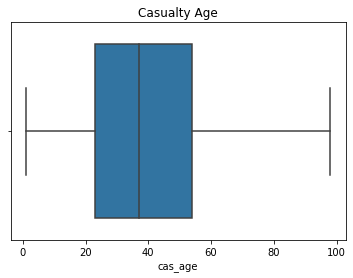

In [11]:
sns.boxplot(data['cas_age'])
plt.title('Casualty Age')
plt.show()

**Comment**<br>
It is reasonable to use mean for replacing missing casualty age. Although there are some outliers in driver age, mean of driver age would not be affected too much by these outliers as their values are very close to the the range. Therefore, Simple imputation with mean would be performed for both feature columns.

In [12]:
imp_cas_age = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cas_age.fit(data[['cas_age']])
data['cas_age']=imp_cas_age.transform(data[['cas_age']])

## 2.2 Categorical features

Sample sizes are small in some categories and these small groups will be combined in a single group

In [13]:
data.loc[data.cas_type=='Pedestrian','n_occupants']=1

In [14]:
data.loc[data.cas_type=='Rider','lic_type']='NoLicence'
data.loc[data.cas_type=='Pedestrian','lic_type']='NoLicence'
data.loc[data.cas_type=='Passenger','lic_type']='NoLicence'

In [15]:
data.loc[data.cas_type=='Rider','seat_belt']='NoSeatBelt'
data.loc[data.cas_type=='Pedestrian','seat_belt']='NoSeatBelt'
data.loc[data.cas_type=='Passenger','seat_belt']='NoSeatBelt'

In [16]:
data.loc[data['thrown_out'].isnull(),].cas_type.unique()

array(['Pedestrian', 'Rider'], dtype=object)

In [17]:
data.loc[data.cas_type=='Rider','thrown_out']='NotApplicable'
data.loc[data.cas_type=='Pedestrian','thrown_out']='NotApplicable'

In [18]:
data.loc[data.cas_pos_in_veh.isnull(),].cas_type.unique()

array(['Rider', 'Pedestrian'], dtype=object)

In [19]:
data.loc[data.cas_type=='Pedestrian','cas_pos_in_veh']='NotApplicable'
data.loc[data.cas_type=='Rider','cas_pos_in_veh']='NotApplicable'

In [20]:
data.isnull().sum()

REPORT_ID          0
UND_UNIT_NUMBER    0
CASUALTY_NUMBER    0
cas_type           0
cas_gender         0
cas_age            0
cas_pos_in_veh     0
thrown_out         0
fatality           0
seat_belt          0
unit_type          0
lic_type           0
unit_movement      0
n_occupants        0
stat_area          0
total_units        0
cas_total          0
day                0
time               0
area_speed         0
acc_pos            0
hor_align          0
ver_align          0
moist_cond         0
wea_cond           0
dayNight           0
crash_type         0
traf_ctrls         0
dtype: int64

**Comment** <br>
The dataset contains no missing values anymore. 

In [21]:
data.loc[data.fatality!='Fatal','fatality']='NotFatal'

In [22]:
data.loc[data.seat_belt=='Fitted - Worn','seat_belt']='Worn'
data.loc[data.seat_belt=='Fitted - Unknown if Worn','seat_belt']='Unknown'
data.loc[data.seat_belt=='Fitted - Not Worn','seat_belt']='NotWorn'
data.loc[data.seat_belt=='Not Fitted','seat_belt']='NotWorn'
data.loc[data.seat_belt=='NoSeatBelt','seat_belt']='NotWorn'

In [23]:
data.acc_pos.value_counts()

Not Divided            3969
T-Junction             2921
Cross Road             2910
Divided Road           2101
Freeway                 184
Multiple                 86
Pedestrian Crossing      85
Rail Crossing            24
One Way                  20
Interchange              13
Other                    13
Rail Xing                12
Ramp On                  10
Ramp Off                  8
Y-Junction                3
Crossover                 2
Name: acc_pos, dtype: int64

Groups of Rail Crossing,One Way, Interchange,Rail Xing,Ramp On,Ramp Off,Y-Junction,Crossover have very limited sample size compared to other groups, so these groups would be combined with Other.

In [24]:
data.loc[data.acc_pos=='Rail Crossing','acc_pos']='Other'
data.loc[data.acc_pos=='One Way','acc_pos']='Other'
data.loc[data.acc_pos=='Interchange','acc_pos']='Other'
data.loc[data.acc_pos=='Rail Xing','acc_pos']='Other'
data.loc[data.acc_pos=='Ramp On','acc_pos']='Other'
data.loc[data.acc_pos=='Ramp Off','acc_pos']='Other'
data.loc[data.acc_pos=='Y-Junction','acc_pos']='Other'
data.loc[data.acc_pos=='Crossover','acc_pos']='Other'

In [25]:
data.traf_ctrls.value_counts()

No Control                   7956
Traffic Signals              2305
Give Way Sign                1055
Stop Sign                     587
Roundabout                    438
Rail Xing - Boom               10
Rail Xing-Traffic Signals       8
Rail Xing - Flashing            1
Other                           1
Name: traf_ctrls, dtype: int64

In [26]:
data.loc[data.traf_ctrls=='Rail Xing - Boom','traf_ctrls']='Other'
data.loc[data.traf_ctrls=='Rail Xing-Traffic Signals','traf_ctrls']='Other'
data.loc[data.traf_ctrls=='Rail Xing - Flashing','traf_ctrls']='Other'

In [27]:
data.unit_movement.value_counts()

Straight Ahead                            7649
Stopped on Carriageway                    2009
Right Turn                                1087
Swerving                                   307
Crossing without Control                   276
Left Turn                                  227
Crossing with Traffic Signals              105
U Turn                                     103
Leaving Private Driveway                   102
Overtaking - on Right                       90
Walking on Road                             81
Entering Private Driveway                   74
Walking on Footpath                         68
Parked                                      51
Overtaking - on Left                        26
Pushing or Working on Vehicle               17
On Pedestrian Crossing                      17
Alighted from Parked Vehicle                16
UnParking - Parallel                        11
Other (e.g. Police on Traffic Control)       7
Reversing                                    7
Parking - Par

In [28]:
data.loc[data.cas_type=='Pedestrian','unit_movement'].value_counts()

Crossing without Control                  276
Crossing with Traffic Signals             105
Walking on Road                            81
Walking on Footpath                        68
On Pedestrian Crossing                     17
Pushing or Working on Vehicle              17
Alighted from Parked Vehicle               16
Other (e.g. Police on Traffic Control)      7
Walked from between Parked Vehicles         6
Within 30m of Pedestrian Crossing           3
Walking on Road - Against the Traffic       3
Playing on Roadway                          2
Name: unit_movement, dtype: int64

In [29]:
data.loc[data.unit_movement=='Walked from between Parked Vehicles','unit_movement']='OtherPedest'
data.loc[data.unit_movement=='Within 30m of Pedestrian Crossing','unit_movement']='OtherPedest'
data.loc[data.unit_movement=='Walking on Road - Against the Traffic','unit_movement']='OtherPedest'
data.loc[data.unit_movement=='Playing on Roadway','unit_movement']='OtherPedest'
data.loc[data.unit_movement=='Other (e.g. Police on Traffic Control)','unit_movement']='OtherPedest'

### 2.2.1 Vehicle type

Vehicle would be reclassified into small number of categories due to small samples. <br>
The new groups are as followed: <br>

**Small**
Motor Cars - Sedan 
Motor Cars - Tourer
Small Wheel Vehicle User
Taxi Cab


**PCycling**
Power Asst. Bicycle
Scooter
Pedal Cycle

**Medium**
Light Truck LT 4.5T
OMNIBUS
Forward Control Passenger Van
Panel Van
Station Wagon


**Large**
BDOUBLE - ROAD TRAIN
SEMI TRAILER
RIGID TRUCK LGE GE 4.5T
Tram


**Wheelchair**
Wheelchair / Elec. Wheelchair 
Motorised Wheelchair/Gopher


**MCycling**
Motor Vehicle - Type Unknown
Motor Cycle

In [30]:
data['unit_type'].value_counts()

Motor Cars - Sedan                6302
Station Wagon                     2241
Pedal Cycle                        976
Motor Cycle                        943
Utility                            774
Pedestrian on Road                 500
Panel Van                          126
Scooter                             90
Pedestrian on Footpath/Carpark      72
RIGID TRUCK LGE GE 4.5T             50
SEMI TRAILER                        45
Taxi Cab                            41
Motor Vehicle - Type Unknown        39
Forward Control Passenger Van       37
OMNIBUS                             27
Other Defined Special Vehicle       24
Light Truck LT 4.5T                 18
Small Wheel Vehicle User            13
Motorised Wheelchair/Gopher         13
Motor Cars - Tourer                 11
Power Asst. Bicycle                  8
BDOUBLE - ROAD TRAIN                 6
Wheelchair / Elec. Wheelchair        3
Tram                                 2
Name: unit_type, dtype: int64

In [31]:
data.loc[data['unit_type']=='Motor Cars - Sedan','unit_type']='Small'
data.loc[data['unit_type']=='Motor Cars - Tourer','unit_type']='Small'
data.loc[data['unit_type']=='Small Wheel Vehicle User','unit_type']='Small'
data.loc[data['unit_type']=='Taxi Cab','unit_type']='Small'

data.loc[data['unit_type']=='Power Asst. Bicycle','unit_type']='PCycling'
data.loc[data['unit_type']=='Scooter','unit_type']='PCycling'
data.loc[data['unit_type']=='Pedal Cycle','unit_type']='PCycling'

data.loc[data['unit_type']=='Light Truck LT 4.5T','unit_type']='Medium'
data.loc[data['unit_type']=='OMNIBUS','unit_type']='Medium'
data.loc[data['unit_type']=='Forward Control Passenger Van','unit_type']='Medium'
data.loc[data['unit_type']=='Panel Van','unit_type']='Medium'
data.loc[data['unit_type']=='Station Wagon','unit_type']='Medium'

data.loc[data['unit_type']=='BDOUBLE - ROAD TRAIN','unit_type']='Large'
data.loc[data['unit_type']=='SEMI TRAILER','unit_type']='Large'
data.loc[data['unit_type']=='RIGID TRUCK LGE GE 4.5T','unit_type']='Large'
data.loc[data['unit_type']=='Tram','unit_type']='Large'

data.loc[data['unit_type']=='Motor Vehicle - Type Unknown','unit_type']='MCycling'
data.loc[data['unit_type']=='Motor Cycle','unit_type']='MCycling'

data.loc[data['unit_type']=='Wheelchair / Elec. Wheelchair','unit_type']='Wheelchair'
data.loc[data['unit_type']=='Motorised Wheelchair/Gopher','unit_type']='Wheelchair'


In [32]:
data['unit_type'].value_counts()

Small                             6367
Medium                            2449
PCycling                          1074
MCycling                           982
Utility                            774
Pedestrian on Road                 500
Large                              103
Pedestrian on Footpath/Carpark      72
Other Defined Special Vehicle       24
Wheelchair                          16
Name: unit_type, dtype: int64

In [33]:
data.cas_pos_in_veh.value_counts()

Driver                                  7345
NotApplicable                           2589
Front Seat Left Passenger               1481
Rear Seat Left Passenger                 392
Rear Seat Right Passenger                336
Rear Seat Middle Passenger               123
Passenger of Motorcycle                   28
Passenger on Multi-Passenger Vehicle      23
Unknown                                   21
Other                                      9
Front Seat Middle Passenger                8
Back of Enclosed Van                       3
Occupant of a Unit Being Towed             2
Back Open Utility or Truck                 1
Name: cas_pos_in_veh, dtype: int64

In [34]:
data.loc[data.cas_pos_in_veh=='Unknown','cas_pos_in_veh']='Other'
data.loc[data.cas_pos_in_veh=='Back of Enclosed Van ','cas_pos_in_veh']='Other'
data.loc[data.cas_pos_in_veh=='Occupant of a Unit Being Towed','cas_pos_in_veh']='Other'
data.loc[data.cas_pos_in_veh=='Back Open Utility or Truck','cas_pos_in_veh']='Other'

### 2.2.2 Time

Time will be divided into two groups - "peak" or "off-peak" for efficiently modeling. Time in between 8:00am and 9:30am or in between 4:00pm and 6:00pm would be classified as "peak", and "off-peak" otherwise. 

In [35]:
data.time.unique()

array(['05:10 pm', '04:50 pm', '08:19 am', ..., '09:31 am', '12:02 am',
       '12:03 pm'], dtype=object)

In [36]:
def time(series):
    l = []
    for row in series:
        items = row.split(" ")
        tmp = items[0].split(':')
        if items[1]=='am':
            tmp2 = int(tmp[0])*100+int(tmp[1])
            if tmp2>=800 and tmp2 <=930:
                l.append('peak')
            else:
                l.append('off-peak')
        else:
            tmp2 = int(tmp[0])*100+int(tmp[1])
            if tmp2>=400 and tmp2 <=600:
                l.append('peak')
            else:
                l.append('off-peak')
            
    return pd.Series(l)

In [37]:
data.time = time(data.time)

In [38]:
data.to_csv('datas/data_cleaned.csv',index=False)